<a href="https://colab.research.google.com/github/BHRA2004/Stock_Price_Prediction_Analysis/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the Ticker:AAPL


[*********************100%***********************]  1 of 1 completed


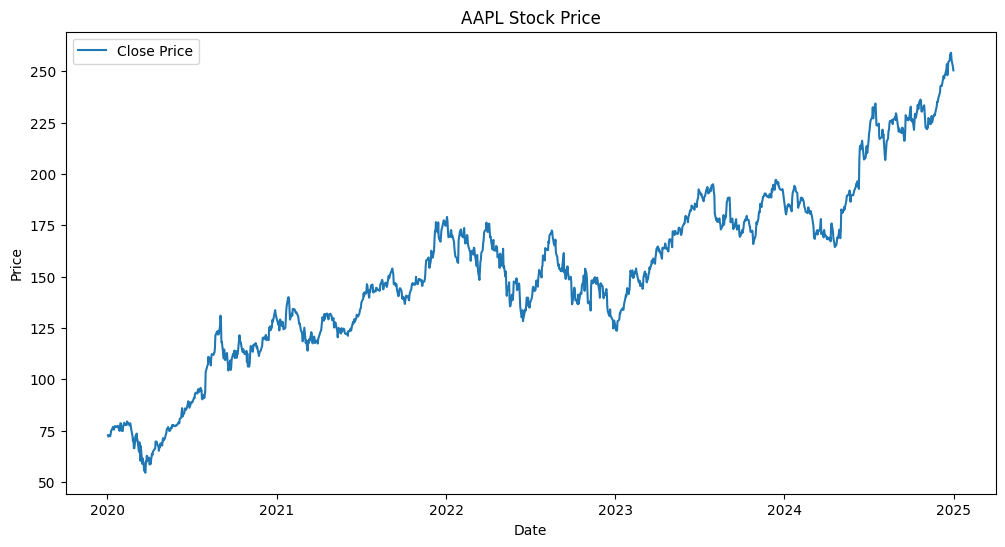

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker_symbol = input("Enter the Ticker:")
start_date = "2020-01-01"
end_date = "2025-01-01"

data = yf.download(ticker_symbol, start=start_date, end=end_date)

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{ticker_symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,152.344947,153.876450,150.637191,152.189645,9.057384e+07
std,42.119394,42.260654,41.895275,42.062841,5.325460e+07
min,54.509758,55.513126,51.652716,55.411089,2.323470e+07
25%,127.085918,128.211048,125.072536,126.527630,5.546825e+07
50%,150.926765,152.679048,148.982984,150.745895,7.627980e+07
75%,177.025871,178.586154,175.451089,176.830834,1.077425e+08
max,259.019989,260.100006,257.630005,258.190002,4.265100e+08


In [ ]:
print(data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [ ]:
data["SMA_10"] = data["Close"].rolling(window=10, min_periods=1).mean()
data["SMA_50"] = data["Close"].rolling(window=50, min_periods=1).mean()
print(data['SMA_10'])

Date
2020-01-02     72.796013
2020-01-03     72.442142
2020-01-06     72.515663
2020-01-07     72.466988
2020-01-08     72.670459
                 ...    
2024-12-24    251.290002
2024-12-26    252.543001
2024-12-27    253.306000
2024-12-30    253.712999
2024-12-31    253.650999
Name: SMA_10, Length: 1258, dtype: float64


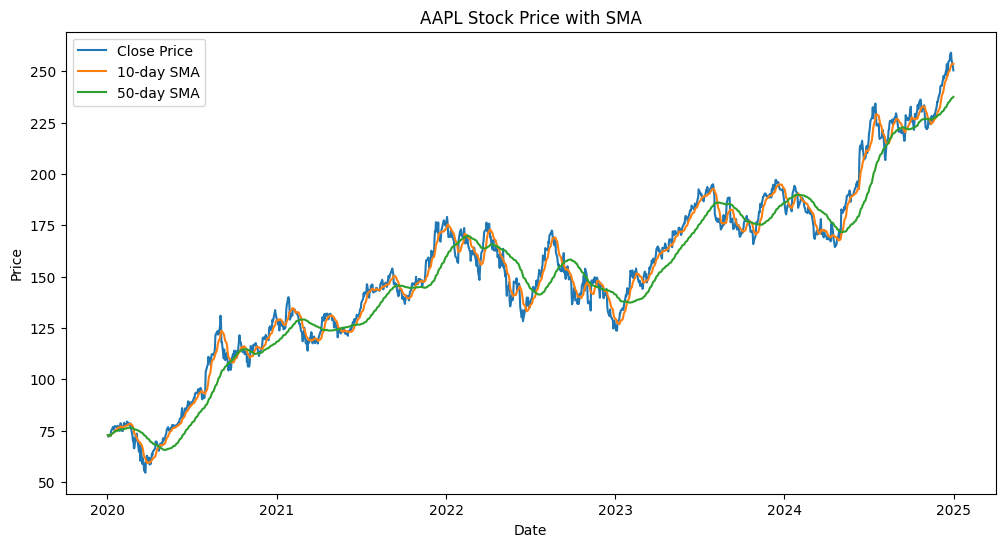

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_10'], label='10-day SMA')
plt.plot(data['SMA_50'], label='50-day SMA')
plt.title(f'{ticker_symbol} Stock Price with SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


In [ ]:
def compute_rsi(data, window=14):
    delta = data["Close"].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data["RSI_14"] = compute_rsi(data)

print(data[["Close", "RSI_14"]].tail())

Price            Close     RSI_14
Ticker            AAPL           
Date                             
2024-12-24  258.200012  76.180663
2024-12-26  259.019989  76.812098
2024-12-27  255.589996  69.300654
2024-12-30  252.199997  58.382041
2024-12-31  250.419998  53.982563


Price             Close      High       Low      Open    Volume    SMA_10  \
Ticker             AAPL      AAPL      AAPL      AAPL      AAPL             
Price  Ticker                                                               
Close  AAPL    1.000000  0.999398  0.999395  0.998661 -0.638028  0.994745   
High   AAPL    0.999398  1.000000  0.999260  0.999400 -0.629674  0.995575   
Low    AAPL    0.999395  0.999260  1.000000  0.999401 -0.645816  0.994884   
Open   AAPL    0.998661  0.999400  0.999401  1.000000 -0.637617  0.995552   
Volume AAPL   -0.638028 -0.629674 -0.645816 -0.637617  1.000000 -0.635026   
SMA_10         0.994745  0.995575  0.994884  0.995552 -0.635026  1.000000   
SMA_50         0.971997  0.972929  0.971628  0.972384 -0.636592  0.981478   
RSI_14         0.087403  0.078448  0.086819  0.077881 -0.077891  0.016097   

Price            SMA_50    RSI_14  
Ticker                             
Price  Ticker                      
Close  AAPL    0.971997  0.087403  
High   A

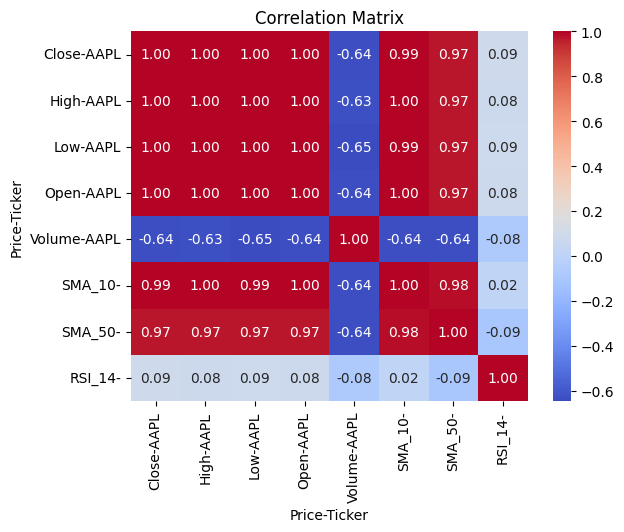

In [ ]:
correlation = data.corr()
print(correlation)

import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-116-7182afc58242>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")  # Pass the 1D arrays to barplot


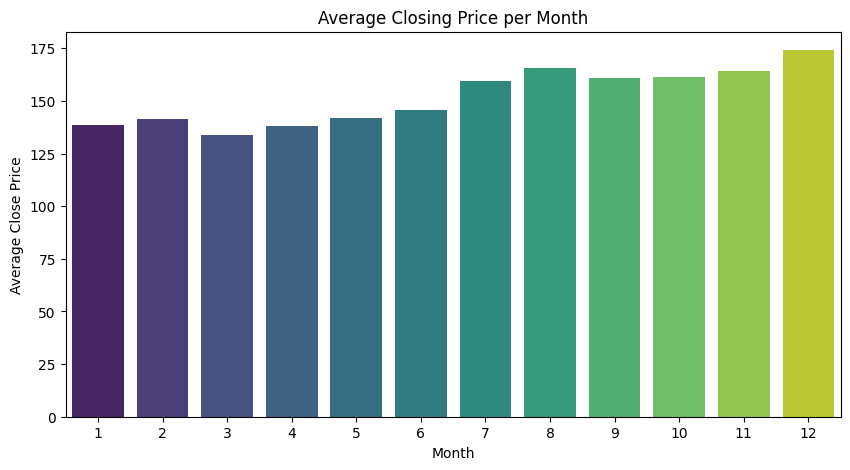

<ipython-input-116-7182afc58242>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], y=y_values, palette="coolwarm")


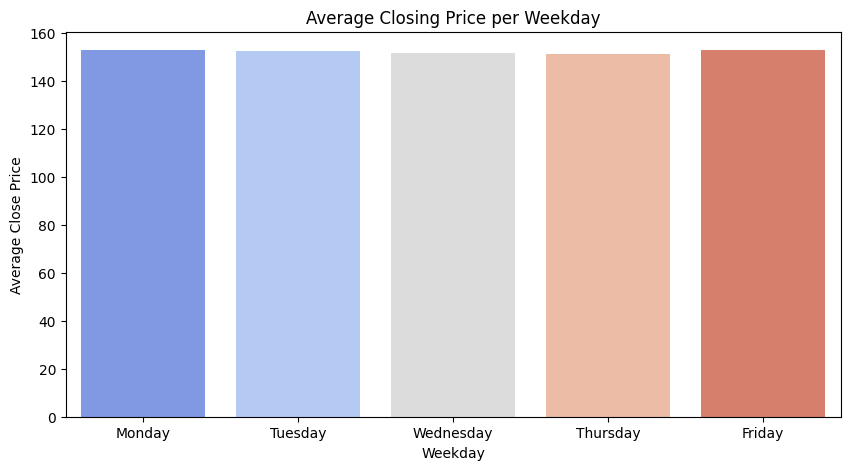

<ipython-input-116-7182afc58242>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Q1', 'Q2', 'Q3', 'Q4'], y=quarter_avg.values.flatten(), palette="Blues_r")


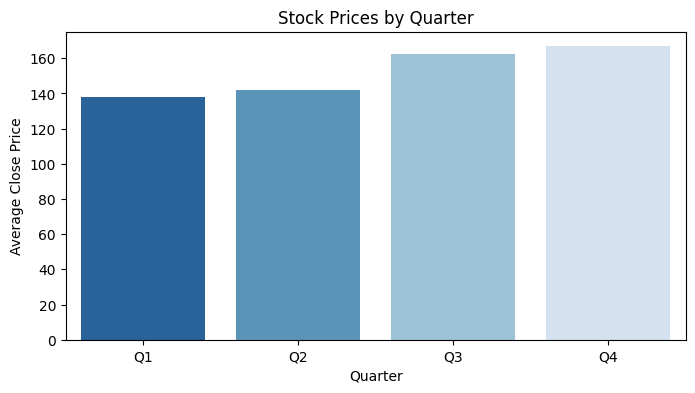

In [ ]:
import pandas as pd
# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Extract time-based features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday  # 0 = Monday, 6 = Sunday
data['Day_of_Year'] = data.index.dayofyear  # 1 to 365
data['Week_of_Year'] = data.index.isocalendar().week
data['Quarter'] = data.index.quarter  # 1 to 4

import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and calculate the average closing price
monthly_avg = data.groupby('Month')['Close'].mean()

# Convert monthly_avg.index and monthly_avg.values to 1D arrays
x = monthly_avg.index.to_numpy()  # or monthly_avg.index.tolist()
y = monthly_avg.values  # already a 1D NumPy array, but can also use .tolist()

y = y.flatten()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="viridis")  # Pass the 1D arrays to barplot
plt.title("Average Closing Price per Month")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.show()

# Group by weekday and calculate the average closing price
weekday_avg = data.groupby('Weekday')['Close'].mean()

y_values = weekday_avg.values.flatten()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], y=y_values, palette="coolwarm")
plt.title("Average Closing Price per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Close Price")
plt.show()

# Group by quarter
quarter_avg = data.groupby('Quarter')['Close'].mean()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=['Q1', 'Q2', 'Q3', 'Q4'], y=quarter_avg.values.flatten(), palette="Blues_r")
plt.title("Stock Prices by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Close Price")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['Close']])

print(scaled_data[:5])

[[0.08941487]
 [0.0859542 ]
 [0.08876302]
 [0.08709199]
 [0.09278062]]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'scaled_data' contains your scaled 'Close' prices
X = data[['SMA_10', 'SMA_50', 'RSI_14', 'Year', 'Month', 'Day', 'Weekday', 'Day_of_Year', 'Week_of_Year', 'Quarter']]  # Features
y = scaled_data  # Target variable (scaled 'Close' prices)

# Remove rows with NaN values in either X or y
X = X.dropna()

# Reset index of X to use numerical index before aligning y
X = X.reset_index(drop=True)
y = y[X.index]  # Now align y using the numerical index of X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

from sklearn.metrics import mean_squared_error

# Example for Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0004046555941166472


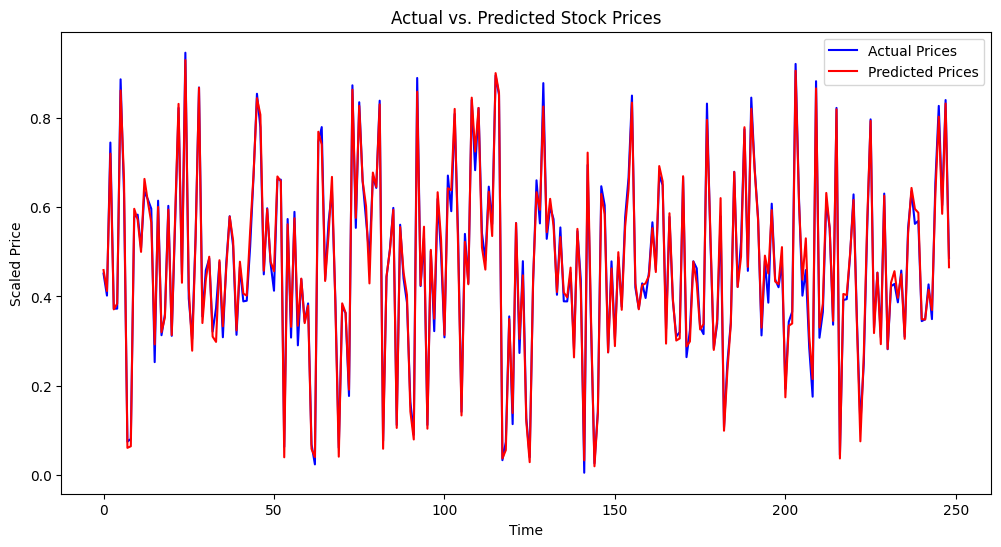

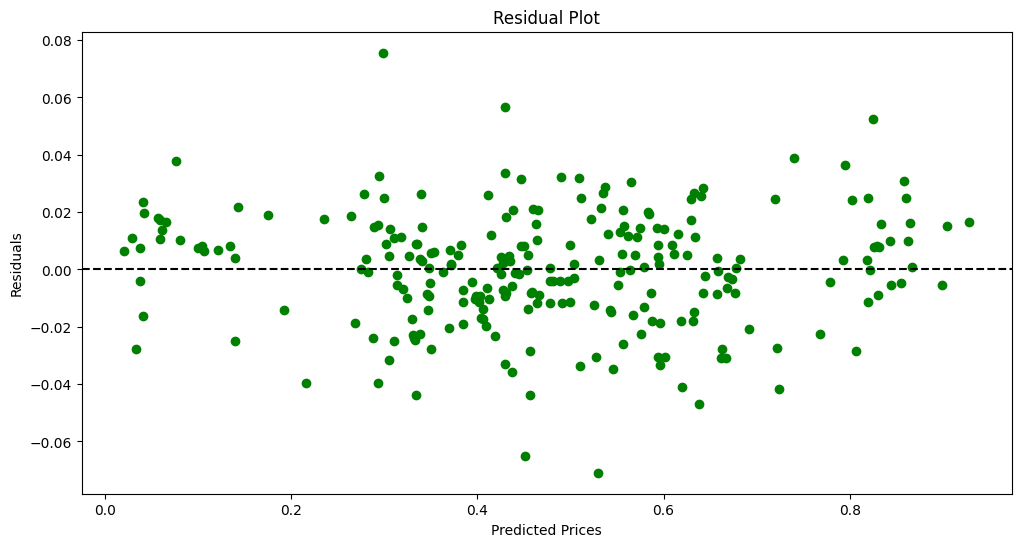

In [ ]:
import matplotlib.pyplot as plt

# Visualization 1: Actual vs. Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

# Visualization 2: Residual Plot
residuals = y_test - predictions
plt.figure(figsize=(12, 6))
plt.scatter(predictions, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

Model R² Score: 0.8407
          Date  Predicted_Close
0   2025-01-01       219.262571
1   2025-01-02       219.368874
2   2025-01-03       219.475176
3   2025-01-04       219.581479
4   2025-01-05       219.687782
..         ...              ...
360 2025-12-27       257.531585
361 2025-12-28       257.637888
362 2025-12-29       257.744190
363 2025-12-30       257.850493
364 2025-12-31       257.956796

[365 rows x 2 columns]


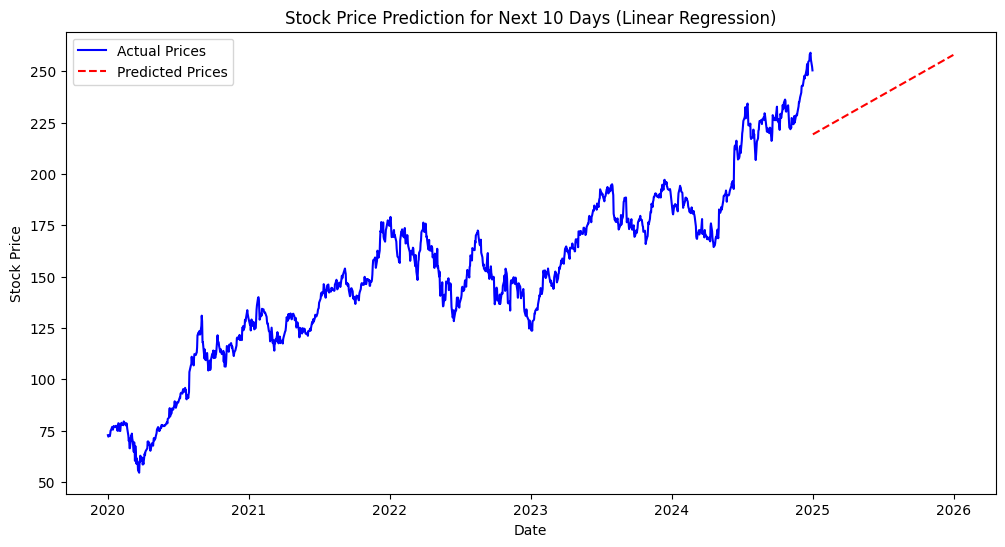

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

df = data.copy()  # Create a copy to avoid modifying the original 'data'

# If 'Date' is not already the index, set it as the index:
if 'Date' in df.columns:
    df = df.set_index('Date')

# Sort by date (if not already sorted)
df = df.sort_index(ascending=True)

# Select only 'Close' prices for prediction
data = df[['Close']]

# Convert dates into a numerical index (Days since start)
data["Days"] = np.arange(len(data))

# Define X (independent variable - days) and y (dependent variable - close price)
X = data["Days"].values.reshape(-1,1)  # Reshape for sklearn
y = data["Close"].values

# Train the model
model = LinearRegression()
model.fit(X, y)

# Check model accuracy (R² score)
r2 = model.score(X, y)
print(f"Model R² Score: {r2:.4f}")  # Closer to 1 means better fit

# Predict the next 365 days
future_days = np.arange(len(data), len(data) + 365).reshape(-1,1)
future_predictions = model.predict(future_days)

# Create a DataFrame to store future predictions
future_dates = pd.date_range(start=df.index[-1], periods=366, freq="D")[1:]  # Exclude last known date
future_predictions = future_predictions.flatten()  # Convert 1D array to 1D list
future_df = pd.DataFrame({"Date": future_dates, "Predicted_Close": future_predictions})
print(future_df)

plt.figure(figsize=(12,6))

# Plot historical stock prices
plt.plot(df.index, df["Close"], label="Actual Prices", color="blue")

# Plot future predictions
plt.plot(future_dates, future_predictions, label="Predicted Prices", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction for Next 10 Days (Linear Regression)")
plt.legend()
plt.show()


1️Steps to Build an LSTM Model
 Step 1: Preprocess the stock price data.
 Step 2: Reshape the data for LSTM input.
 Step 3: Build the LSTM model using TensorFlow/Keras.
 Step 4: Train the model and make predictions.
 Step 5: Evaluate the model and visualize results.

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0529 - val_loss: 0.0254
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0029 - val_loss: 0.0073
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0027 - val_loss: 0.0072
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 

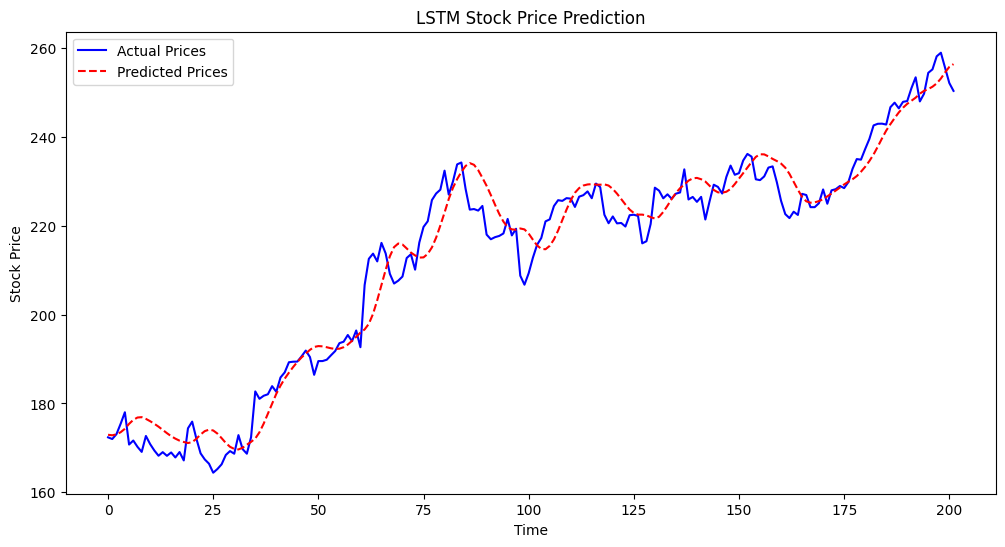

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load stock data (Assuming 'Date' and 'Close' columns exist)
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#ticker_symbol = input("Enter the ticker symbol: ")
start_date = "2020-01-01"
end_date = "2024-01-01"
data1 = yf.download("AAPL", start=start_date, end=end_date)

# Sort by date (ascending order)
data = data.sort_index(ascending=True)

# Select only the 'Close' price for prediction
prices = data[['Close']]

# Normalize prices (LSTM works better with scaled data)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)

# Define training data size (80% training, 20% testing)
train_size = int(len(scaled_prices) * 0.8)
train_data, test_data = scaled_prices[:train_size], scaled_prices[train_size:]

def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  # 50 days of past prices
        y.append(data[i+time_steps])    # Predict next day's price
    return np.array(X), np.array(y)

time_steps = 50  # Use the past 50 days to predict the next day
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

# Reshape for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),  # LSTM layer 1
    Dropout(0.2),  # Prevents overfitting
    LSTM(units=50, return_sequences=True),  # LSTM layer 2
    Dropout(0.2),
    LSTM(units=50),  # LSTM layer 3
    Dropout(0.2),
    Dense(units=1)  # Output layer (predict next day's price)
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Compile model
model.summary()  # Print model architecture

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on test data
y_pred_scaled = model.predict(X_test)

# Convert predictions back to original stock price scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(12,6))
plt.plot(y_test_original, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle="dashed")
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()